# 2D filtering on face dataset

In [1]:
#import required libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#load data

fea = pd.read_csv('faces_fea.csv',header=None)

# Data is saved in a dataframe 'fea' where rows are images (n=2414) and columns are pixels (m=32*32=1024)
# To plot the images as 2-D you first need to reshape each column (1-D) into a 2-D matrix
# This is done for you below in the examples that plot the images 

In [3]:
#open up data to see what we're working with -- note that pixel values range from 0 to 255

fea.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,82,81,72,72,40,93,119,129,135,121,...,91,89,92,75,80,67,57,35,33,22
1,86,86,74,67,47,66,87,101,118,132,...,89,82,87,69,60,57,41,20,14,9
2,76,88,80,62,60,20,22,40,75,137,...,80,73,70,52,37,37,16,9,6,6
3,15,16,22,11,23,8,7,7,6,4,...,14,12,9,11,9,10,7,7,5,5
4,70,69,48,64,46,109,138,147,136,102,...,94,88,83,65,74,78,66,45,39,34


In [4]:
#normalize data to range from 0 to 1; recheck what it looks like

fea/=fea.max().max()

fea.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.321569,0.317647,0.282353,0.282353,0.156863,0.364706,0.466667,0.505882,0.529412,0.474510,...,0.356863,0.349020,0.360784,0.294118,0.313725,0.262745,0.223529,0.137255,0.129412,0.086275
1,0.337255,0.337255,0.290196,0.262745,0.184314,0.258824,0.341176,0.396078,0.462745,0.517647,...,0.349020,0.321569,0.341176,0.270588,0.235294,0.223529,0.160784,0.078431,0.054902,0.035294
2,0.298039,0.345098,0.313725,0.243137,0.235294,0.078431,0.086275,0.156863,0.294118,0.537255,...,0.313725,0.286275,0.274510,0.203922,0.145098,0.145098,0.062745,0.035294,0.023529,0.023529
3,0.058824,0.062745,0.086275,0.043137,0.090196,0.031373,0.027451,0.027451,0.023529,0.015686,...,0.054902,0.047059,0.035294,0.043137,0.035294,0.039216,0.027451,0.027451,0.019608,0.019608
4,0.274510,0.270588,0.188235,0.250980,0.180392,0.427451,0.541176,0.576471,0.533333,0.400000,...,0.368627,0.345098,0.325490,0.254902,0.290196,0.305882,0.258824,0.176471,0.152941,0.133333


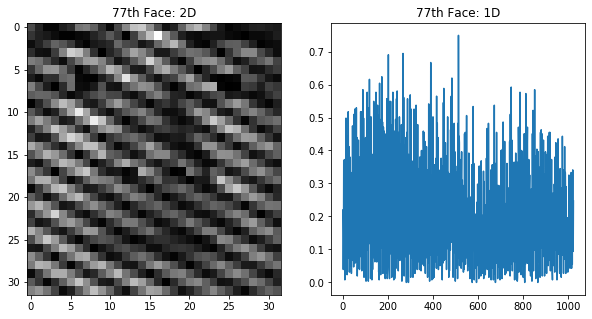

In [5]:
#plot 77th face

faceNum = 77

faceW = 32 #number of pixels in image width
faceH = 32 #number of pixels i|n image height
face = np.reshape(np.asarray(fea.iloc[faceNum-1,:]),(faceH,faceW)).T

plt.figure(figsize=(10,5))

plt.subplot(121)
plt.imshow(face,cmap='gray',aspect='auto')
plt.title('77th Face: 2D')

plt.subplot(122)
plt.plot(fea.iloc[faceNum-1,:])
plt.title('77th Face: 1D')

plt.show()

In [6]:
#2D fft of 77th face
x = face
Nx = np.shape(x)[0] #number of pixels in x-direction
Ny = np.shape(x)[1] #number of pixels in y-direction
Lx = Nx #length of x-direction
Ly = Ny #length of y-direction
dx = 1 #spatial sampling in x-direction
dy = 1 #spatial sampling in y-direction

xfft = np.fft.fft2(x)
power = abs(np.square(xfft))
power[0] = 0 #remove power from mean signal
power_shift= np.fft.fftshift(power)

kx = np.arange(int(-Nx/2),int(Nx/2))*2*np.pi/Lx
ky = np.arange(int(-Ny/2),int(Ny/2))*2*np.pi/Ly

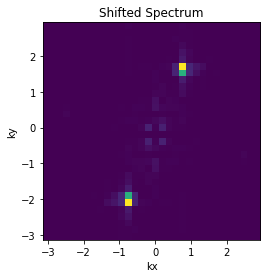

In [7]:
#visualize

extent_power = [np.min(kx), np.max(kx), np.min(ky), np.max(ky)]

plt.imshow(power_shift, extent = extent_power)
plt.title('Shifted Spectrum')
plt.xlabel('kx')
plt.ylabel('ky')
plt.show()

In [8]:
#manually select point where the noise is --> set these to 0

power_filter = np.copy(power)
power_filter[19:26,3:8] = 0
power_filter[6:13,25:29] = 0

power_filter_shift = np.fft.fftshift(power_filter)

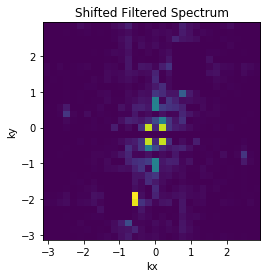

In [9]:
#visualize the filtered spectrum

plt.imshow(power_filter_shift, extent = extent_power)
plt.title('Shifted Filtered Spectrum')
plt.xlabel('kx')
plt.ylabel('ky')
plt.show()

In [10]:
#filter xfft and then take inverse fourier transform

xfft_filter = np.copy(xfft)
xfft_filter[19:26,3:8] = 0
xfft_filter[6:13,25:29] = 0

face_filter = np.real(np.fft.ifft2(xfft_filter)) #ignore imaginary artifacts

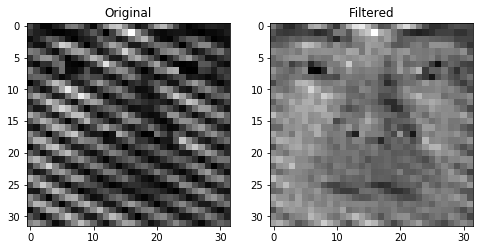

In [11]:
#visualize

plt.figure(figsize=(8,4))

plt.subplot(121)
plt.imshow(face,cmap='gray')
plt.title('Original')

plt.subplot(122)
plt.imshow(face_filter,cmap='gray')
plt.title('Filtered')

plt.show()

### Q2: Apply a similar noise removal method for the 79th face in the dataset.


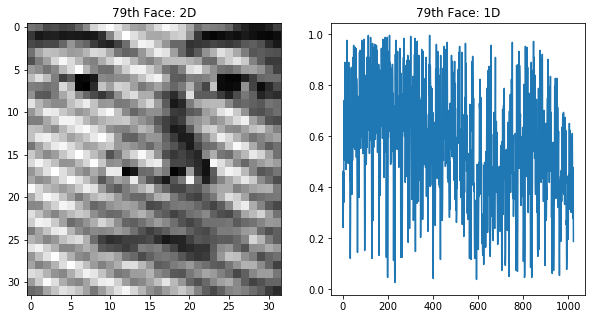

In [12]:
#plot 77th face

faceNum = 79

faceW = 32 #number of pixels in image width
faceH = 32 #number of pixels i|n image height
face = np.reshape(np.asarray(fea.iloc[faceNum-1,:]),(faceH,faceW)).T

plt.figure(figsize=(10,5))

plt.subplot(121)
plt.imshow(face,cmap='gray',aspect='auto')
plt.title('79th Face: 2D')

plt.subplot(122)
plt.plot(fea.iloc[faceNum-1,:])
plt.title('79th Face: 1D')

plt.show()

In [13]:
#2D fft of 77th face
x = face
Nx = np.shape(x)[0] #number of pixels in x-direction
Ny = np.shape(x)[1] #number of pixels in y-direction
Lx = Nx #length of x-direction
Ly = Ny #length of y-direction
dx = 1 #spatial sampling in x-direction
dy = 1 #spatial sampling in y-direction

xfft = np.fft.fft2(x)
power = abs(np.square(xfft))
power[0] = 0 #remove power from mean signal
power_shift= np.fft.fftshift(power)

kx = np.arange(int(-Nx/2),int(Nx/2))*2*np.pi/Lx
ky = np.arange(int(-Ny/2),int(Ny/2))*2*np.pi/Ly

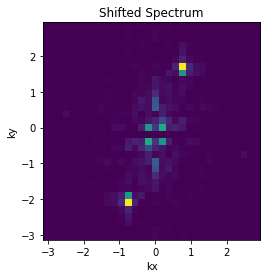

In [14]:
#visualize

extent_power = [np.min(kx), np.max(kx), np.min(ky), np.max(ky)]

plt.imshow(power_shift, extent = extent_power)
plt.title('Shifted Spectrum')
plt.xlabel('kx')
plt.ylabel('ky')
plt.show()

In [15]:
#manually select point where the noise is --> set these to 0

power_filter = np.copy(power)
power_filter[19:26,3:8] = 0
power_filter[6:13,25:29] = 0

power_filter_shift = np.fft.fftshift(power_filter)

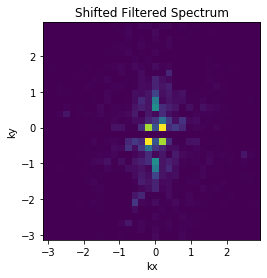

In [16]:
#visualize the filtered spectrum

plt.imshow(power_filter_shift, extent = extent_power)
plt.title('Shifted Filtered Spectrum')
plt.xlabel('kx')
plt.ylabel('ky')
plt.show()

In [17]:
#filter xfft and then take inverse fourier transform

xfft_filter = np.copy(xfft)
xfft_filter[19:26,3:8] = 0
xfft_filter[6:13,25:29] = 0

face_filter = np.real(np.fft.ifft2(xfft_filter)) #ignore imaginary artifacts

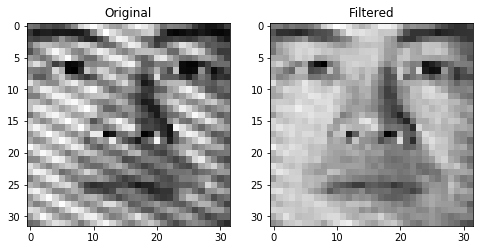

In [18]:
#visualize

plt.figure(figsize=(8,4))

plt.subplot(121)
plt.imshow(face,cmap='gray')
plt.title('Original')

plt.subplot(122)
plt.imshow(face_filter,cmap='gray')
plt.title('Filtered')

plt.show()

### Let now keep only the small wavelenghts of the filtered image from above i.e. apply a low-passing 2-D filter 

In [19]:
#2D fft of 77th face
x = face_filter
Nx = np.shape(x)[0] #number of pixels in x-direction
Ny = np.shape(x)[1] #number of pixels in y-direction
Lx = Nx #length of x-direction
Ly = Ny #length of y-direction
dx = 1 #spatial sampling in x-direction
dy = 1 #spatial sampling in y-direction

xfft = np.fft.fft2(x)
power = abs(np.square(xfft))
power[0] = 0 #remove power from mean signal
power_shift= np.fft.fftshift(power)

kx = np.arange(int(-Nx/2),int(Nx/2))*2*np.pi/Lx
ky = np.arange(int(-Ny/2),int(Ny/2))*2*np.pi/Ly

In [20]:
#keep only small values of k
xindex = 4
yindex = 7

power_filter = np.zeros_like(power)
power_filter[:yindex,:xindex] = power[:yindex,:xindex]
power_filter[-yindex:,-xindex:] = power[-yindex:,-xindex:]
power_filter[:yindex,-xindex:] = power[:yindex,-xindex:]
power_filter[-yindex:,:xindex] = power[-yindex:,:xindex]

xfft_filter = np.zeros_like(xfft)
xfft_filter[:yindex,:xindex] = xfft[:yindex,:xindex]
xfft_filter[-yindex:,-xindex:] = xfft[-yindex:,-xindex:]
xfft_filter[:yindex,-xindex:] = xfft[:yindex,-xindex:]
xfft_filter[-yindex:,:xindex] = xfft[-yindex:,:xindex]

face_filter = np.real(np.fft.ifft2(xfft_filter)) #ignore imaginary artifacts

power_filter_shift = np.fft.fftshift(power_filter)

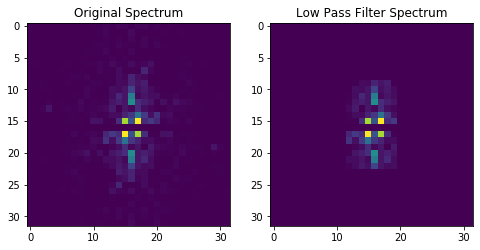

In [21]:
#visualize the filtered spectrum

plt.figure(figsize=(8,4))

plt.subplot(121)
plt.imshow(power_shift)
plt.title('Original Spectrum')

plt.subplot(122)
plt.imshow(power_filter_shift)
plt.title('Low Pass Filter Spectrum')

plt.show()

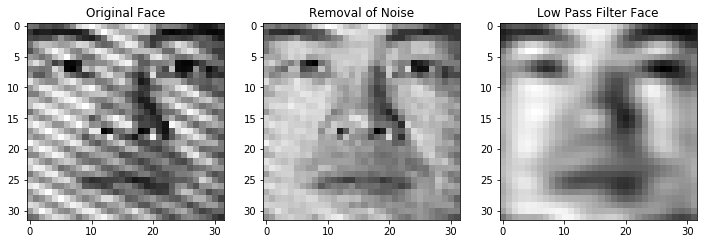

In [22]:
#visualize the filtered face

plt.figure(figsize=(12,4))

plt.subplot(131)
plt.imshow(face,cmap='gray')
plt.title('Original Face')

plt.subplot(132)
plt.imshow(x,cmap='gray')
plt.title('Removal of Noise')

plt.subplot(133)
plt.imshow(face_filter,cmap='gray')
plt.title('Low Pass Filter Face')

plt.show()
